## 1. Setup 

### 1.1 Imports libs

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### 1.2 Loading data

We need following files for this project:
- `target_gene_names.txt`: gene names of the targets
- `drug_PubChem_CIDs.txt`: PubChem CIDs of the drugs
- `drug-drug_similarities_2D.txt`: drug-drug structural fingerprint similarities computed the Structure Clustering sever at PubChem
- `target-target_similarities_WS_normalized.txt`: target-target sequence similarities computed with the normalized versions of the Smith-Waterman (SW) score.
- `drug-target_interaction_affinities_Kd__Davis_et_al.2011.txt`: drug-target interaction affinities.

The rows (and columns) of the drug-drug similarity matrices correspond to the rows of the interaction affinity matrix and the rows (and columns) of the target-target similarity matrices correspond to the columns of the interaction affinity matrix.

In [5]:
target_gene_names = pd.read_csv("target_gene_names.txt", header=None, index_col = 0)
drug_pubchemIDs = pd.read_csv("drug_PubChem_CIDs.txt", header=None, index_col = 0) 

target_gene_names

""
0
AAK1
ABL1(E255K)-phosphorylated
ABL1(F317I)-nonphosphorylated
ABL1(F317I)-phosphorylated
ABL1(F317L)-nonphosphorylated


In [7]:
f1,f2=open("target_gene_names.txt"),open("drug_PubChem_CIDs.txt")
id1,id2=[],[]
for i in f1:
    k=i.strip("\n")
    id1.append(k)
for i in f2:
    k=i.strip("\n")
    id2.append(int(k))

In [9]:
sim_targets=pd.read_csv("target-target_similarities_WS_normalized.txt",sep=r"\s+",header=None,names=id1)
sim_targets.index=id1
sim_targets

,AAK1,ABL1(E255K)-phosphorylated,ABL1(F317I)-nonphosphorylated,ABL1(F317I)-phosphorylated,ABL1(F317L)-nonphosphorylated
AAK1,100.00,45.48,45.48,45.48,45.48
ABL1(E255K)-phosphorylated,45.48,100.00,100.00,100.00,100.00
ABL1(F317I)-nonphosphorylated,45.48,100.00,100.00,100.00,100.00
ABL1(F317I)-phosphorylated,45.48,100.00,100.00,100.00,100.00
ABL1(F317L)-nonphosphorylated,45.48,100.00,100.00,100.00,100.00


In [11]:
sim_drugs=pd.read_csv("drug-drug_similarities_2D.txt",sep=r"\s+",header=None,names=id2)
sim_drugs.index=id2
sim_drugs

,11314340,11409972,11338033,10184653,5287969
11314340,1.000,0.605,0.647,0.539,0.636
11409972,0.605,1.000,0.651,0.432,0.619
11338033,0.647,0.651,1.000,0.459,0.715
10184653,0.539,0.432,0.459,1.000,0.480
5287969,0.636,0.619,0.715,0.480,1.000


In [13]:
bindings=pd.read_csv("drug-target_interaction_affinities_Kd__Davis_et_al.2011.txt",sep=r"\s+",header=None,names=id1)
bindings.index=id2
bindings

,AAK1,ABL1(E255K)-phosphorylated,ABL1(F317I)-nonphosphorylated,ABL1(F317I)-phosphorylated,ABL1(F317L)-nonphosphorylated
11314340,43.0,10000.0,10000.0,10000.0,10000.00
11409972,10000.0,75.0,1.9,13.0,0.77
11338033,10000.0,420.0,2900.0,750.0,580.00
10184653,10000.0,5300.0,1600.0,10000.0,5900.00
5287969,10000.0,1200.0,63.0,2600.0,800.00


### 1.3 Preprocessing

In davis dataset, standard value is Kd in nM. we used the transformation below:

### $pK_{d}=-log_{10}\frac{K_d}{1e9}$ 


In [17]:
drug_pubchemIDs.sort_index(inplace=True)
target_gene_names.sort_index(inplace=True)

bindings.sort_index(inplace=True)
sim_targets.sort_index(inplace=True)
sim_drugs.sort_index(inplace=True)

sim_targets = sim_targets/100
transformed_bindings = -np.log10(bindings/(10**9))

transformed_bindings.head()

,AAK1,ABL1(E255K)-phosphorylated,ABL1(F317I)-nonphosphorylated,ABL1(F317I)-phosphorylated,ABL1(F317L)-nonphosphorylated
5287969,5.000000,5.920819,7.200659,5.585027,6.096910
10184653,5.000000,5.275724,5.795880,5.000000,5.229148
11314340,7.366532,5.000000,5.000000,5.000000,5.000000
11338033,5.000000,6.376751,5.537602,6.124939,6.236572
11409972,5.000000,7.124939,8.721246,7.886057,9.113509


In [19]:
sim_targets

,AAK1,ABL1(E255K)-phosphorylated,ABL1(F317I)-nonphosphorylated,ABL1(F317I)-phosphorylated,ABL1(F317L)-nonphosphorylated
AAK1,1.0000,0.4548,0.4548,0.4548,0.4548
ABL1(E255K)-phosphorylated,0.4548,1.0000,1.0000,1.0000,1.0000
ABL1(F317I)-nonphosphorylated,0.4548,1.0000,1.0000,1.0000,1.0000
ABL1(F317I)-phosphorylated,0.4548,1.0000,1.0000,1.0000,1.0000
ABL1(F317L)-nonphosphorylated,0.4548,1.0000,1.0000,1.0000,1.0000


(array([11.,  3.,  3.,  2.,  0.,  3.,  0.,  1.,  0.,  2.]),
 array([5.        , 5.41135093, 5.82270185, 6.23405278, 6.64540371,
        7.05675464, 7.46810556, 7.87945649, 8.29080742, 8.70215835,
        9.11350927]),
 <BarContainer object of 10 artists>)

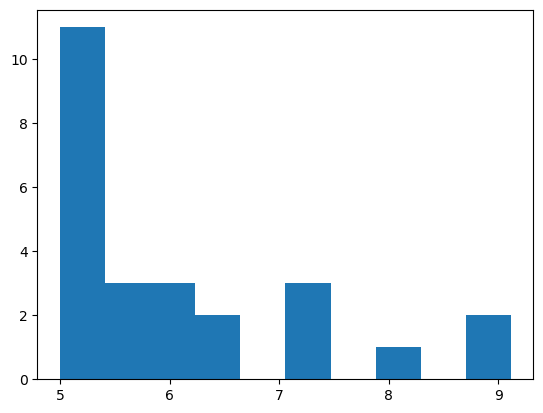

In [21]:
plt.hist(transformed_bindings.stack())

As you can see in histogram. The peak at pKd value 5 (10000 nM), These values correspond to the negative pairs that either have very weak binding affinities (Kd > 10000nM) or are not observed in the primary screen.

### 1.4 Drug-Target-Binding

In [25]:
drug_target_binding = None
l=[]
for i in id1:
    for j in id2:
        k=transformed_bindings.loc[j,i]
        l2=[j,i,k]
        l.append(l2)
drug_target_binding=pd.DataFrame(l,columns=['Drug', 'Target', 'Binding_Val'])
drug_target_binding

,Drug,Target,Binding_Val
0,11314340,AAK1,7.366532
1,11409972,AAK1,5.000000
2,11338033,AAK1,5.000000
3,10184653,AAK1,5.000000
4,5287969,AAK1,5.000000
5,11314340,ABL1(E255K)-phosphorylated,5.000000
6,11409972,ABL1(E255K)-phosphorylated,7.124939
7,11338033,ABL1(E255K)-phosphorylated,6.376751
8,10184653,ABL1(E255K)-phosphorylated,5.275724
9,5287969,ABL1(E255K)-phosphorylated,5.920819


## 2.Feature Engineering 

In this part we are going to extract some feature for each target/drug. after that we will replace these features with their names/pubchemIDs. 

### 2.1 Average Similarities and Binding values

In [30]:
sim_targets

,AAK1,ABL1(E255K)-phosphorylated,ABL1(F317I)-nonphosphorylated,ABL1(F317I)-phosphorylated,ABL1(F317L)-nonphosphorylated
AAK1,1.0000,0.4548,0.4548,0.4548,0.4548
ABL1(E255K)-phosphorylated,0.4548,1.0000,1.0000,1.0000,1.0000
ABL1(F317I)-nonphosphorylated,0.4548,1.0000,1.0000,1.0000,1.0000
ABL1(F317I)-phosphorylated,0.4548,1.0000,1.0000,1.0000,1.0000
ABL1(F317L)-nonphosphorylated,0.4548,1.0000,1.0000,1.0000,1.0000


In [32]:
for i in sim_targets:
    target_gene_names.loc[i,'t_avg-sim']=np.mean(sim_targets.loc[i,:])

target_gene_names

,t_avg-sim
0,
AAK1,0.56384
ABL1(E255K)-phosphorylated,0.89096
ABL1(F317I)-nonphosphorylated,0.89096
ABL1(F317I)-phosphorylated,0.89096
ABL1(F317L)-nonphosphorylated,0.89096


In [34]:
transformed_bindings

,AAK1,ABL1(E255K)-phosphorylated,ABL1(F317I)-nonphosphorylated,ABL1(F317I)-phosphorylated,ABL1(F317L)-nonphosphorylated
5287969,5.000000,5.920819,7.200659,5.585027,6.096910
10184653,5.000000,5.275724,5.795880,5.000000,5.229148
11314340,7.366532,5.000000,5.000000,5.000000,5.000000
11338033,5.000000,6.376751,5.537602,6.124939,6.236572
11409972,5.000000,7.124939,8.721246,7.886057,9.113509


In [36]:
target_bindingvals={}
for i in range(len(drug_target_binding)):
    x=drug_target_binding.iloc[i,:] #drug=x[0],target=x[1],binding_val=[2]
    if x[1] not in target_bindingvals:
        target_bindingvals[x[1]]=[x[2]]
    else:
        target_bindingvals[x[1]].append(x[2])
for i in target_bindingvals:
    target_gene_names.loc[i,'t_avg-binding']=np.mean(target_bindingvals[i])

target_gene_names

/var/folders/zv/3sgsf2b53h5c2gqb0mm8kv2w0000gn/T/ipykernel_1365/2945862279.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1] not in target_bindingvals:
/var/folders/zv/3sgsf2b53h5c2gqb0mm8kv2w0000gn/T/ipykernel_1365/2945862279.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_bindingvals[x[1]]=[x[2]]
/var/folders/zv/3sgsf2b53h5c2gqb0mm8kv2w0000gn/T/ipykernel_1365/2945862279.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.i

,t_avg-sim,t_avg-binding
0,,
AAK1,0.56384,5.473306
ABL1(E255K)-phosphorylated,0.89096,5.939646
ABL1(F317I)-nonphosphorylated,0.89096,6.451078
ABL1(F317I)-phosphorylated,0.89096,5.919204
ABL1(F317L)-nonphosphorylated,0.89096,6.335228


In [38]:
for i in sim_drugs:
    drug_pubchemIDs.loc[i,'d_avg-sim']=np.mean(sim_drugs.loc[i,:])

drug_bindingvals={}
for i in range(len(drug_target_binding)):
    x=drug_target_binding.iloc[i,:] #drug=x[0],target=x[1],binding_val=[2]
    if x[0] not in drug_bindingvals:
        drug_bindingvals[x[0]]=[x[2]]
    else:
        drug_bindingvals[x[0]].append(x[2])
for i in drug_bindingvals:
    drug_pubchemIDs.loc[i,'d_avg-binding']=np.mean(drug_bindingvals[i])

drug_pubchemIDs

/var/folders/zv/3sgsf2b53h5c2gqb0mm8kv2w0000gn/T/ipykernel_1365/4215504843.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[0] not in drug_bindingvals:
/var/folders/zv/3sgsf2b53h5c2gqb0mm8kv2w0000gn/T/ipykernel_1365/4215504843.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  drug_bindingvals[x[0]]=[x[2]]
/var/folders/zv/3sgsf2b53h5c2gqb0mm8kv2w0000gn/T/ipykernel_1365/4215504843.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc

,d_avg-sim,d_avg-binding
0,,
5287969,0.6900,5.960683
10184653,0.5820,5.260150
11314340,0.6854,5.473306
11338033,0.6944,5.855173
11409972,0.6614,7.569150


### 2.2 Drug/Target Similarity Networks

#### 2.2.1 Build Networks

You must build two networks one for drugs and another one for targets. The nodes are drugs or targets, and an edge between two nodes exists if their similarity is above a threshold. The value of threshold is up to you. \
For building networks, we are going to use [igraph](https://igraph.org/) package. 

In [43]:
target_gene_names.loc[:,"t_avg-sim"].describe()

count    5.000000
mean     0.825536
std      0.146293
min      0.563840
25%      0.890960
50%      0.890960
75%      0.890960
max      0.890960
Name: t_avg-sim, dtype: float64

In [45]:
drug_pubchemIDs.loc[:,"d_avg-sim"].describe()

count    5.00000
mean     0.66264
std      0.04685
min      0.58200
25%      0.66140
50%      0.68540
75%      0.69000
max      0.69440
Name: d_avg-sim, dtype: float64

In [47]:
import igraph

In [49]:
sim_drugs=sim_drugs.reindex(sorted(sim_drugs.columns),axis=1) #sorting columns
sim_drugs

,5287969,10184653,11314340,11338033,11409972
5287969,1.000,0.480,0.636,0.715,0.619
10184653,0.480,1.000,0.539,0.459,0.432
11314340,0.636,0.539,1.000,0.647,0.605
11338033,0.715,0.459,0.647,1.000,0.651
11409972,0.619,0.432,0.605,0.651,1.000


In [51]:
sim_targets=sim_targets.reindex(sorted(sim_targets.columns),axis=1) #sorting columns
sim_targets

,AAK1,ABL1(E255K)-phosphorylated,ABL1(F317I)-nonphosphorylated,ABL1(F317I)-phosphorylated,ABL1(F317L)-nonphosphorylated
AAK1,1.0000,0.4548,0.4548,0.4548,0.4548
ABL1(E255K)-phosphorylated,0.4548,1.0000,1.0000,1.0000,1.0000
ABL1(F317I)-nonphosphorylated,0.4548,1.0000,1.0000,1.0000,1.0000
ABL1(F317I)-phosphorylated,0.4548,1.0000,1.0000,1.0000,1.0000
ABL1(F317L)-nonphosphorylated,0.4548,1.0000,1.0000,1.0000,1.0000


In [53]:
drug_sim_threshold = 0.6
target_sim_threshold = 0.8

drug_graph = igraph.Graph()
target_graph = igraph.Graph()

drug_graph.add_vertices(len(sim_drugs))
target_graph.add_vertices(len(sim_targets))

for i, drug_1 in enumerate(sim_drugs):
    for j, drug_2 in enumerate(sim_drugs):
        if (sim_drugs.loc[drug_1,drug_2] > drug_sim_threshold) and (drug_1!=drug_2) :
            drug_graph.add_edges([(i, j)])

for i, tar_1 in enumerate(sim_targets):
    for j, tar_2 in enumerate(sim_targets):
        if (sim_targets.loc[tar_1,tar_2] > target_sim_threshold) and (tar_1!=tar_2):
            target_graph.add_edges([(i, j)])


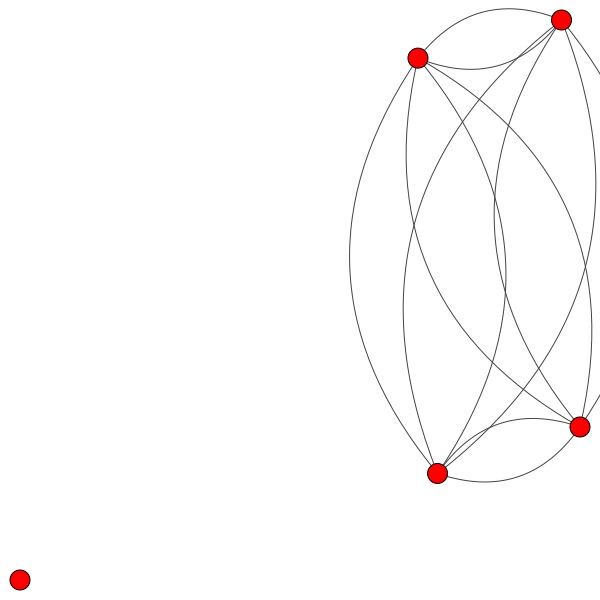

In [55]:
igraph.plot(drug_graph)

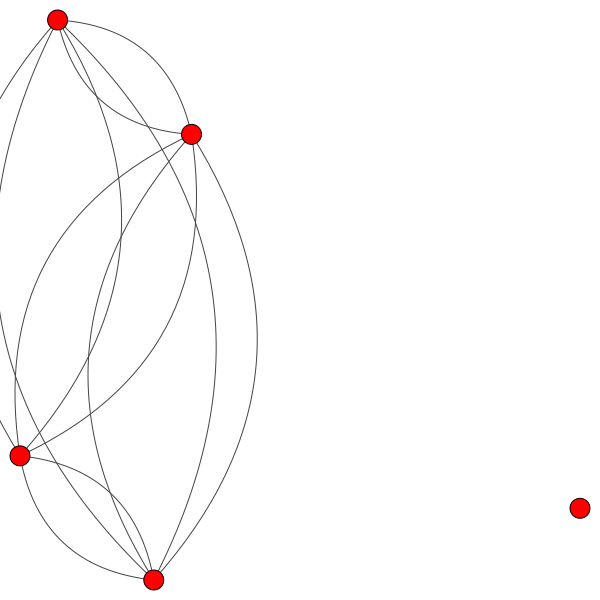

In [57]:
igraph.plot(target_graph)

#### 2.2.2 Number of neighbors, PageRank

In [60]:
sim_targets

,AAK1,ABL1(E255K)-phosphorylated,ABL1(F317I)-nonphosphorylated,ABL1(F317I)-phosphorylated,ABL1(F317L)-nonphosphorylated
AAK1,1.0000,0.4548,0.4548,0.4548,0.4548
ABL1(E255K)-phosphorylated,0.4548,1.0000,1.0000,1.0000,1.0000
ABL1(F317I)-nonphosphorylated,0.4548,1.0000,1.0000,1.0000,1.0000
ABL1(F317I)-phosphorylated,0.4548,1.0000,1.0000,1.0000,1.0000
ABL1(F317L)-nonphosphorylated,0.4548,1.0000,1.0000,1.0000,1.0000


In [62]:
for vertex in target_graph.vs:
    target_gene_names.loc[sorted(id1)[vertex.index], 't_n_neighbors'] = target_graph.neighborhood_size(vertex,mindist=1)
    target_gene_names.loc[sorted(id1)[vertex.index], 't_page_rank'] = target_graph.pagerank(vertex)


for vertex in drug_graph.vs:
    drug_pubchemIDs.loc[sorted(id2)[vertex.index], 'd_n_neighbors'] = drug_graph.neighborhood_size(vertex,mindist=1)
    drug_pubchemIDs.loc[sorted(id2)[vertex.index], 'd_page_rank'] = drug_graph.pagerank(vertex)

target_gene_names.tail()


,t_avg-sim,t_avg-binding,t_n_neighbors,t_page_rank
0,,,,
AAK1,0.56384,5.473306,0.0,0.036145
ABL1(E255K)-phosphorylated,0.89096,5.939646,3.0,0.240964
ABL1(F317I)-nonphosphorylated,0.89096,6.451078,3.0,0.240964
ABL1(F317I)-phosphorylated,0.89096,5.919204,3.0,0.240964
ABL1(F317L)-nonphosphorylated,0.89096,6.335228,3.0,0.240964


In [64]:
drug_pubchemIDs

,d_avg-sim,d_avg-binding,d_n_neighbors,d_page_rank
0,,,,
5287969,0.6900,5.960683,3.0,0.240964
10184653,0.5820,5.260150,0.0,0.036145
11314340,0.6854,5.473306,3.0,0.240964
11338033,0.6944,5.855173,3.0,0.240964
11409972,0.6614,7.569150,3.0,0.240964


### 2.3 Non-negative Matrix Factorization

For extracting features from binding affinity matrix we are going to use [Non-negative Matrix Factorization](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization). 

In NMF, we are trying to approximately factor a matrix $B ∈ R_+^{d×t}$ (binding affinity matrix of d drugs and t targets) into two matrices $P ∈ R_+^{k×d}$ and $Q ∈ R_+^{k×t}$ which  $B = P^TQ$

In this problem, you can set $k$ (Latent dimension of $P$ and $Q$ matrices) to any number below 10.


The columns of the factor matrices P and Q are utilized as parts of the feature vectors for the drugs and targets respectively.

In [68]:
from sklearn.decomposition import NMF

In [70]:
model = NMF(n_components=2, init='random', random_state=0)
P = model.fit_transform(transformed_bindings)
Q = model.components_

for idx,x in enumerate(sorted(id2)):
    drug_pubchemIDs.loc[x,"d_features1"]=P.T[idx][0]
    drug_pubchemIDs.loc[x,"d_features2"]=P.T[idx][1] 
#drug_pubchemIDs

for idx,x in enumerate(sorted(id1)):
    target_gene_names.loc[x,"t_features1"]=Q[idx][0]
    target_gene_names.loc[x,"t_features2"]=Q[idx][1]
#target_gene_names

target_gene_names

,t_avg-sim,t_avg-binding,t_n_neighbors,t_page_rank,t_features1,t_features2
0,,,,,,
AAK1,0.56384,5.473306,0.0,0.036145,1.183163,2.260719
ABL1(E255K)-phosphorylated,0.89096,5.939646,3.0,0.240964,2.740134,0.818888
ABL1(F317I)-nonphosphorylated,0.89096,6.451078,3.0,0.240964,3.405705,0.422683
ABL1(F317I)-phosphorylated,0.89096,5.919204,3.0,0.240964,2.934169,0.607616
ABL1(F317L)-nonphosphorylated,0.89096,6.335228,3.0,0.240964,3.444513,0.320239


In [72]:
drug_pubchemIDs

,d_avg-sim,d_avg-binding,d_n_neighbors,d_page_rank,d_features1,d_features2
0,,,,,,
5287969,0.6900,5.960683,3.0,0.240964,1.761297,1.284242
10184653,0.5820,5.260150,0.0,0.036145,1.445900,1.464628
11314340,0.6854,5.473306,3.0,0.240964,1.148717,2.624730
11338033,0.6944,5.855173,3.0,0.240964,1.674155,1.416248
11409972,0.6614,7.569150,3.0,0.240964,2.479192,0.873250


### 2.4 Building Train, Validation and Test Dataset using extracted features

In [75]:
drug_target_binding

,Drug,Target,Binding_Val
0,11314340,AAK1,7.366532
1,11409972,AAK1,5.000000
2,11338033,AAK1,5.000000
3,10184653,AAK1,5.000000
4,5287969,AAK1,5.000000
5,11314340,ABL1(E255K)-phosphorylated,5.000000
6,11409972,ABL1(E255K)-phosphorylated,7.124939
7,11338033,ABL1(E255K)-phosphorylated,6.376751
8,10184653,ABL1(E255K)-phosphorylated,5.275724
9,5287969,ABL1(E255K)-phosphorylated,5.920819


In [77]:
rows_list=[]
for i in id1:#id1=list of target names
    for j in id2:#id2=list of drug names
        d_row=drug_pubchemIDs.loc[j,:].tolist()
        t_row=target_gene_names.loc[i,:].tolist()
        rows_list.append(t_row+d_row)

X=pd.DataFrame(rows_list,columns=['d_avg-sim' ,'d_avg-binding', 'd_n_neighbors' ,'d_page_rank','d_features1' ,'d_features2','t_avg-sim' ,'t_avg-binding', 't_n_neighbors' ,'t_page_rank','t_features1' ,'t_features2'])
Y=drug_target_binding.loc[:,"Binding_Val"]

train_ratio = 0.7
val_ratio = 0.1
test_ratio = 0.2

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - train_ratio)

X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + val_ratio)) 

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((17, 12), (17,), (2, 12), (2,), (6, 12), (6,))

In [79]:
X.shape

(25, 12)

## 3.XGboost 

In [85]:
import xgboost
from sklearn.metrics import mean_squared_error
model = xgboost.XGBRegressor()

In [87]:
def plot_model_results(results):
    epochs = len(results['validation_0']['rmse'])
    x_axis = range(0, epochs)
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
    ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
    ax.legend()
    plt.ylabel('RMSE')
    plt.show()

In [102]:
# Define the model with the best parameters
model = xgboost.XGBRegressor(objective='reg:squarederror', 
                         learning_rate=0.01, 
                         colsample_bytree=0.75,
                         max_depth=5, 
                         subsample=0.7, 
                         n_estimators=150)

# Fit the model and specify the evaluation metric in eval_set
model.fit(X_train, Y_train, 
          eval_set=[(X_train, Y_train), (X_val, Y_val)], 
          verbose=False)

# Calculate the Root Mean Square Error (RMSE) for validation data
validation_rmse = mean_squared_error(Y_val, model.predict(X_val), squared=False)

# Print the RMSE
print("Validation RMSE: %.3f" % validation_rmse)

# Optionally, plot the model evaluation results
#plot_model_results(model.evals_result())  # Make sure the function is defined if you use this line


Validation RMSE: 1.526


### 3.2 Ploting Feature importance

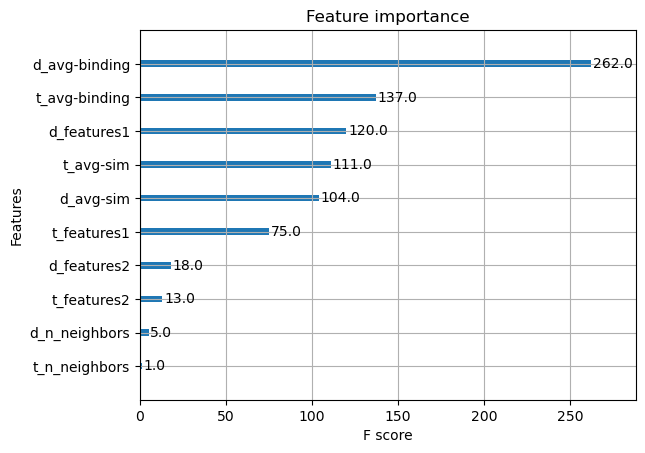

In [92]:
xgboost.plot_importance(model);

### 3.2 Evaluation

Let's make our perdiction binary. either a drug is binded to target or not, use $pK_d$ > 7 threshold as binded (drug-target) pair.

In [100]:
from sklearn.metrics import confusion_matrix

y_true=np.where(Y_test>7,1,0)
y_pred=np.where(model.predict(X_test)>7,1,0)

tn, fp, fn, tp =confusion_matrix(y_true,y_pred).ravel()
tn, fp, fn, tp


test_rmse = mean_squared_error(Y_test,model.predict(X_test))**0.5
test_acc =(tp+tn)/(tp+tn+fn+fp)
test_percision = tp/(tp+fp)
test_recall = tp/(tp+fn)
test_f1 = (2*test_percision*test_recall)/(test_percision+test_recall)

print("Test RMSE: %.3f" % test_rmse)
print("Test Accuracy: %.3f" % test_acc)
#print("Test Percision: %.3f" % test_percision)
print("Test Recall: %.3f" % test_recall)
#print("Test F1-Score: %.3f" % test_f1)

Test RMSE: 0.689
Test Accuracy: 0.833
Test Recall: 0.000


/var/folders/zv/3sgsf2b53h5c2gqb0mm8kv2w0000gn/T/ipykernel_1365/3713211006.py:12: RuntimeWarning: invalid value encountered in scalar divide
  test_percision = tp/(tp+fp)


In [98]:

val_predictions = model.predict(X_val)

val_results = pd.DataFrame({
    'Actual Values': Y_val.values,
    'Predicted Values': val_predictions
})

#print("\nValidation Results:")
#print(val_results)
test_predictions = model.predict(X_test)
test_results = pd.DataFrame({
    'Actual Values': Y_test.values,
    'Predicted Values': test_predictions
})
print("\nTest Results:")
print(test_results)



Test Results:
   Actual Values  Predicted Values
0       5.229148          5.923130
1       5.585027          5.559744
2       5.000000          5.599625
3       5.920819          5.885174
4       7.200659          5.852943
5       6.124939          5.686309
